In [1]:
import os
os.chdir('..')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('overall_acc.csv')
df.head()

,overall_accuracy,model,batch_size,device,seed,trial_type,class_type,object_resize,num_img_per_trial,num_trials_per_image,layers,top_k,map_file,trial_path,results_dir
0,0.876282,cvcl-resnext,128,cuda:1,0,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-07-11
1,0.877137,cvcl-resnext,128,cuda:1,1,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-08-48
2,0.876496,cvcl-resnext,128,cuda:1,2,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-10-19
3,0.770299,cvcl-resnext,128,cuda:1,0,custom,unseen,False,4,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-12-22
4,0.769872,cvcl-resnext,128,cuda:1,1,custom,unseen,False,4,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-14-25


### Get main acc table

In [2]:
# Filter the DataFrame based on the specified conditions
filtered_df = df[(df['num_img_per_trial'] == 4) & 
                 (df['top_k'] == 1) & 
                 (df['object_resize'] == False) &
                 (df['map_file'].notna())]

# Additional filter for DINO models - keep only non-DINO models or dino_s models
filtered_df = filtered_df[
    (~filtered_df['model'].str.startswith('dino')) | 
    (filtered_df['model'].str.startswith('dino_s_'))
]

# Function to format accuracy with standard deviation
def format_acc(group):
    mean = group['overall_accuracy'].mean() * 100
    std = group['overall_accuracy'].std() * 100
    return f"{mean:.2f}±{std:.2f}%"

# Group by model and class_type, then aggregate
result = filtered_df.groupby(['model', 'class_type']).apply(format_acc).unstack()

# Rename columns for clarity
result.columns.name = None
result = result.rename(columns={'unseen': 'Unseen', 'seen': 'Seen', 'full': 'Full'})

# Reorder columns
result = result[['Unseen', 'Seen', 'Full']]

# Reset index to make 'model' a column
result = result.reset_index()

# Rename the 'model' column
result = result.rename(columns={'model': 'Model'})

# Display the result
print(result)

                 Model       Unseen         Seen         Full
0             clip-res  88.66±0.35%  91.59±0.52%  89.79±0.38%
1         cvcl-resnext  76.81±0.35%  79.50±0.78%  77.79±0.40%
2  cvcl-resnext-random  24.09±6.57%  27.00±2.46%  27.79±1.34%
3     dino_s_resnext50  77.96±0.27%  77.53±0.24%  77.65±0.21%
4              resnext  93.28±0.36%  88.17±0.45%  91.88±0.15%


In [3]:
# Filter the DataFrame based on the specified conditions
baseline_df = df[
                 (df['num_img_per_trial'] == 4) & 
                 (df['top_k'].isna()) & 
                 (df['object_resize'] == False) &
                 (df['map_file'].isna())]

# Function to format accuracy with standard deviation
def format_acc(group):
    mean = group['overall_accuracy'].mean() * 100
    std = group['overall_accuracy'].std() * 100
    return f"{mean:.2f}±{std:.2f}%"

# Group by model and class_type, then aggregate
baseline_result = baseline_df.groupby(['model', 'class_type']).apply(format_acc).unstack()

# Rename columns for clarity
baseline_result.columns.name = None

# Reset index to make 'model' a column
baseline_result = baseline_result.reset_index()

# Rename the 'model' column
baseline_result = baseline_result.rename(columns={'model': 'Model'})

# Display the result
print(baseline_result)

          Model         full         seen       unseen
0      clip-res  97.42±0.05%  98.81±0.16%  96.93±0.06%
1  cvcl-resnext          NaN  36.18±0.91%          NaN


Get Out-of-vocab N-way

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('overall_acc.csv')
df.head()

,overall_accuracy,model,batch_size,device,seed,trial_type,class_type,object_resize,num_img_per_trial,num_trials_per_image,layers,top_k,map_file,trial_path,results_dir
0,0.876282,cvcl-resnext,128,cuda:1,0,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-07-11
1,0.877137,cvcl-resnext,128,cuda:1,1,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-08-48
2,0.876496,cvcl-resnext,128,cuda:1,2,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-10-19
3,0.770299,cvcl-resnext,128,cuda:1,0,custom,unseen,False,4,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-12-22
4,0.769872,cvcl-resnext,128,cuda:1,1,custom,unseen,False,4,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-21-14-25


In [5]:
n_way_df = df[(df['top_k'] == 1) & 
        (df['object_resize'] == False) &
        (df['class_type'] == 'unseen') &
        (df['map_file'].notna())]

n_way_df = n_way_df[
    (~df['model'].str.startswith('dino')) | 
    (df['model'].str.startswith('dino_s_'))
]

n_way_df = n_way_df.sort_values(['num_img_per_trial', 'overall_accuracy'], ascending=[True, False])
n_way_df


/tmp/ipykernel_139036/2046605834.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  n_way_df = n_way_df[


,overall_accuracy,model,batch_size,device,seed,trial_type,class_type,object_resize,num_img_per_trial,num_trials_per_image,layers,top_k,map_file,trial_path,results_dir
18,0.973134,resnext,256,cuda:0,0,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/resnext_konk_baby+konk+30k.csv,datasets/trials/unseen_resnext_konk_baby+konk+...,results/resnext_custom_2024-10-18-00-42-49
19,0.971144,resnext,256,cuda:0,1,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/resnext_konk_baby+konk+30k.csv,datasets/trials/unseen_resnext_konk_baby+konk+...,results/resnext_custom_2024-10-18-00-44-48
20,0.968823,resnext,256,cuda:0,2,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/resnext_konk_baby+konk+30k.csv,datasets/trials/unseen_resnext_konk_baby+konk+...,results/resnext_custom_2024-10-18-00-46-45
12,0.949137,clip-res,256,cuda:0,0,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/clip_res_konk_baby+konk+30k.csv,datasets/trials/unseen_clip_res_konk_baby+konk...,results/clip-res_custom_2024-10-17-22-56-37
14,0.942779,clip-res,256,cuda:0,2,custom,unseen,False,2,5,NaN,1.0,neuron_concepts/clip_res_konk_baby+konk+30k.csv,datasets/trials/unseen_clip_res_konk_baby+konk...,results/clip-res_custom_2024-10-17-22-59-48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,0.607448,clip-res,9,cuda:0,1,custom,unseen,False,62,5,NaN,1.0,neuron_concepts/clip_res_konk_baby+konk+30k.csv,datasets/trials/unseen_clip_res_konk_baby+konk...,results/clip-res_custom_2024-10-17-23-33-51
56,0.606358,clip-res,9,cuda:0,2,custom,unseen,False,62,5,NaN,1.0,neuron_concepts/clip_res_konk_baby+konk+30k.csv,datasets/trials/unseen_clip_res_konk_baby+konk...,results/clip-res_custom_2024-10-17-23-41-40
33,0.363675,cvcl-resnext,9,cuda:0,0,custom,unseen,False,62,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-22-00-01
34,0.355983,cvcl-resnext,9,cuda:0,1,custom,unseen,False,62,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/unseen_cvcl_konk_baby+konk+30k...,results/cvcl-resnext_custom_2024-10-17-22-06-50


Analysis results of trial with different backbones

In [6]:
# df = df[~df['model'].str.contains('dino', case=False, na=False)]

grouped = n_way_df.groupby(['model', 'num_img_per_trial']).agg({
    'overall_accuracy': ['mean', 'std', 'count']
}).reset_index() # count is number of exp of each row

grouped

model num_img_per_trial overall_accuracy                
                                                      mean       std count
0              clip-res                 2         0.943748  0.004976     3
1              clip-res                 4         0.886588  0.003491     3
2              clip-res                 8         0.824886  0.002563     3
3              clip-res                16         0.755798  0.002571     3
4              clip-res                32         0.679988  0.006039     3
5              clip-res                62         0.608053  0.002066     3
6          cvcl-resnext                 2         0.876638  0.000445     3
7          cvcl-resnext                 4         0.768091  0.003461     3
8          cvcl-resnext                 8         0.662393  0.005568     3
9          cvcl-resnext                16         0.551638  0.002756     3
10         cvcl-resnext                32         0.446368  0.007061     3
11         cvcl-resnext                62         0.357265  0.005875     3
12  cvcl-resnext-random                 2         0.489211  0.055436     3
13  cvcl-resnext-random                 4         0.240902  0.065738     3
14  cvcl-resnext-random                 8         0.121202  0.025296     3
15  cvcl-resnext-random                16         0.065700  0.014857     3
16  cvcl-resnext-random                32         0.034675  0.010857     3
17     dino_s_resnext50                 2         0.889052  0.003152     3
18     dino_s_resnext50                 4         0.779575  0.002711     3
19     dino_s_resnext50                 8         0.668546  0.014758     3
20     dino_s_resnext50                16         0.562990  0.001531     3
21     dino_s_resnext50                32         0.455801  0.001856     3
22              resnext                 2         0.971034  0.002158     3
23              resnext                 4         0.932836  0.003614     3
24              resnext                 8         0.897347  0.002443     3
25              resnext                16         0.848369  0.001079     3
26              resnext                32         0.797457  0.005892     3
27              resnext                62         0.732891  0.003543     3

In [7]:
# Create a DataFrame with formatted accuracy values
formatted_result = pd.DataFrame()

# Get unique models
models = grouped['model'].unique()

# Create formatted string for each n-way condition
for n in [2, 4, 8, 16, 32]:
    values = []
    for model in models:
        # Get the data for this model and n-way combination
        model_data = grouped[(grouped['model'] == model) & (grouped['num_img_per_trial'] == n)]
        
        # If we have data for this combination
        if len(model_data) > 0:
            row = model_data.iloc[0]
            mean = row['overall_accuracy']['mean'] * 100
            std = row['overall_accuracy']['std'] * 100
            values.append(f"{mean:.2f}±{std:.2f}%")
        else:
            # If no data exists for this combination
            values.append("N/A")
    
    formatted_result[f'{n}-way'] = values

# Set the index to model names
formatted_result.index = models
formatted_result.index.name = 'Model'

print(formatted_result)

                           2-way        4-way        8-way       16-way  \
Model                                                                     
clip-res             94.37±0.50%  88.66±0.35%  82.49±0.26%  75.58±0.26%   
cvcl-resnext         87.66±0.04%  76.81±0.35%  66.24±0.56%  55.16±0.28%   
cvcl-resnext-random  48.92±5.54%  24.09±6.57%  12.12±2.53%   6.57±1.49%   
dino_s_resnext50     88.91±0.32%  77.96±0.27%  66.85±1.48%  56.30±0.15%   
resnext              97.10±0.22%  93.28±0.36%  89.73±0.24%  84.84±0.11%   

                          32-way  
Model                             
clip-res             68.00±0.60%  
cvcl-resnext         44.64±0.71%  
cvcl-resnext-random   3.47±1.09%  
dino_s_resnext50     45.58±0.19%  
resnext              79.75±0.59%  


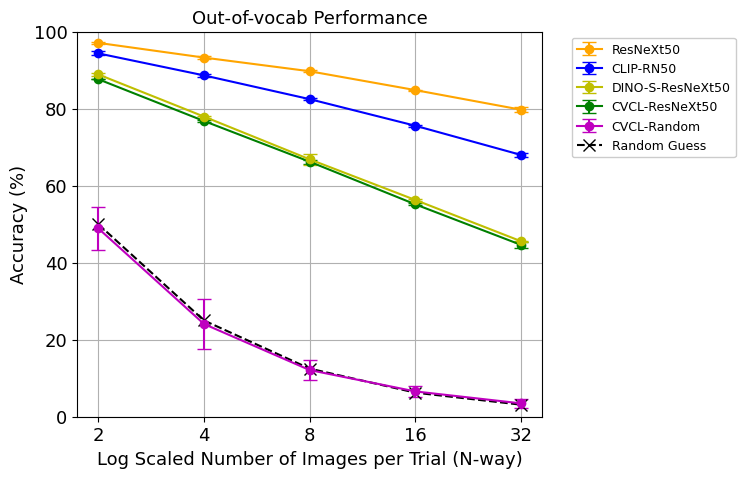

In [2]:
from matplotlib.ticker import PercentFormatter  # Add this import
from matplotlib.ticker import MultipleLocator

df = pd.read_csv('overall_acc.csv')

df = df[(df['top_k'] == 1) & 
        (df['object_resize'] == False) &
        (df['class_type'] == 'unseen') &
        (df['map_file'].notna())]

df = df[
    (~df['model'].str.startswith('dino')) | 
    (df['model'].str.startswith('dino_s_'))
]

df = df.sort_values(['num_img_per_trial', 'overall_accuracy'], ascending=[True, False])


grouped = df.groupby(['model', 'num_img_per_trial']).agg({
    'overall_accuracy': ['mean', 'std', 'count']
}).reset_index() # count is number of exp of each row



# Plotting
fig, ax = plt.subplots(figsize=(6, 5))

#Define model name mappings
model_names = {
    'resnext': 'ResNeXt50',
    'clip-res': 'CLIP-RN50',
    'dino_s_resnext50': 'DINO-S-ResNeXt50',
    'cvcl-resnext': 'CVCL-ResNeXt50',
    'cvcl-resnext-random': 'CVCL-Random'
}

colors = {'cvcl-resnext': 'g', 
          'cvcl-resnext-random':'m',
          'resnext':'orange',
          'clip-res':'b',
          'dino_s_resnext50':'y'}  # Add more colors if more models exist

for model, group in grouped.groupby('model'):
    # Filter data points between 2 and 32
    group = group[(group['num_img_per_trial'] >= 2) & (group['num_img_per_trial'] <= 32)]
    ax.errorbar(group['num_img_per_trial'], group['overall_accuracy']['mean'], yerr=group['overall_accuracy']['std'],
                label=model_names[model], color=colors[model], marker='o', linestyle='-', capsize=5)

# Calculate and plot the baseline
num_images = np.array([2, 4, 8, 16, 32])  # Fixed points for log scale
baseline = 1 / num_images
ax.plot(num_images, baseline, label='Random Guess', color='black', linestyle='--', marker='x', markersize=8)

# Set x-axis to log scale
ax.set_xscale('log', base=2)
ax.set_xticks(num_images)
ax.set_xticklabels(num_images)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Format y-axis as percentage (specify that input data is in 0-1 range)
ax.yaxis.set_major_formatter(lambda x, p: f'{int(x*100)}')  # Format as 0-100 without % symbol
ax.yaxis.set_major_locator(MultipleLocator(0.2))  # Set major ticks every 0.2 (20 in display)
ax.set_ylim(0, 1.0)  # Keep original 0-1 scale

ax.tick_params(axis='both', which='major', labelsize=13)  # Adjust tick label size

title_font = 13 
ax.set_xlabel('Log Scaled Number of Images per Trial (N-way)', fontsize=title_font)
ax.set_ylabel('Accuracy (%)', fontsize=title_font)
ax.set_title('Out-of-vocab Performance', fontsize=title_font)
# Create ordered handles and labels
handles, labels = ax.get_legend_handles_labels()
# Create a mapping of label to handle
label_handle_map = dict(zip(labels, handles))

# Define desired order (including 'Random Guess' at the end)
desired_order = ['ResNeXt50', 'CLIP-RN50', 'DINO-S-ResNeXt50', 'CVCL-ResNeXt50', 'CVCL-Random', 'Random Guess']

# Reorder handles based on desired order
ordered_handles = [label_handle_map[label] for label in desired_order]
ordered_labels = desired_order

ax.legend(ordered_handles, ordered_labels, 
        #  title='Model',
         bbox_to_anchor=(1.05, 1), 
         loc='upper left', 
         fontsize=9,
         framealpha=1.0)

plt.grid(True)
plt.savefig('plots/out-of-vocab_acc.pdf', bbox_inches='tight', dpi=300)
plt.show()

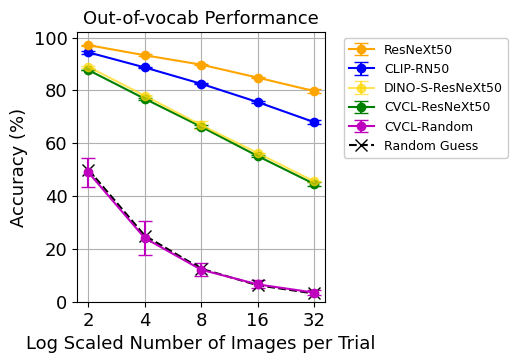

In [4]:
from matplotlib.ticker import PercentFormatter  # Add this import
from matplotlib.ticker import MultipleLocator

df = pd.read_csv('overall_acc.csv')

df = df[(df['top_k'] == 1) & 
        (df['object_resize'] == False) &
        (df['class_type'] == 'unseen') &
        (df['map_file'].notna())]

df = df[
    (~df['model'].str.startswith('dino')) | 
    (df['model'].str.startswith('dino_s_'))
]

df = df.sort_values(['num_img_per_trial', 'overall_accuracy'], ascending=[True, False])


grouped = df.groupby(['model', 'num_img_per_trial']).agg({
    'overall_accuracy': ['mean', 'std', 'count']
}).reset_index() # count is number of exp of each row



# Plotting
fig, ax = plt.subplots(figsize=(3.2, 3.5))

#Define model name mappings
model_names = {
    'resnext': 'ResNeXt50',
    'clip-res': 'CLIP-RN50',
    'dino_s_resnext50': 'DINO-S-ResNeXt50',
    'cvcl-resnext': 'CVCL-ResNeXt50',
    'cvcl-resnext-random': 'CVCL-Random'
}

colors = {'cvcl-resnext': 'g', 
          'cvcl-resnext-random':'m',
          'resnext':'orange',
          'clip-res':'b',
          'dino_s_resnext50':'#FFD700AA'}  # 使用半透明的金黄色

for model, group in grouped.groupby('model'):
    # Filter data points between 2 and 32
    group = group[(group['num_img_per_trial'] >= 2) & (group['num_img_per_trial'] <= 32)]
    ax.errorbar(group['num_img_per_trial'], group['overall_accuracy']['mean'], yerr=group['overall_accuracy']['std'],
                label=model_names[model], color=colors[model], marker='o', linestyle='-', capsize=5)

# Calculate and plot the baseline
num_images = np.array([2, 4, 8, 16, 32])  # Fixed points for log scale
baseline = 1 / num_images
ax.plot(num_images, baseline, label='Random Guess', color='black', linestyle='--', marker='x', markersize=8)

# Set x-axis to log scale
ax.set_xscale('log', base=2)
ax.set_xticks(num_images)
ax.set_xticklabels(num_images)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Format y-axis as percentage (specify that input data is in 0-1 range)
ax.yaxis.set_major_formatter(lambda x, p: f'{int(x*100)}')  # Format as 0-100 without % symbol
ax.yaxis.set_major_locator(MultipleLocator(0.2))  # Set major ticks every 0.2 (20 in display)
ax.set_ylim(0, 1.02)  # Keep original 0-1 scale

ax.tick_params(axis='both', which='major', labelsize=13)  # Adjust tick label size

title_font = 13 
ax.set_xlabel('Log Scaled Number of Images per Trial', fontsize=title_font)
ax.set_ylabel('Accuracy (%)', fontsize=title_font)
ax.set_title('Out-of-vocab Performance', fontsize=title_font)
# Create ordered handles and labels
handles, labels = ax.get_legend_handles_labels()
# Create a mapping of label to handle
label_handle_map = dict(zip(labels, handles))

# Define desired order (including 'Random Guess' at the end)
desired_order = ['ResNeXt50', 'CLIP-RN50', 'DINO-S-ResNeXt50', 'CVCL-ResNeXt50', 'CVCL-Random', 'Random Guess']

# Reorder handles based on desired order
ordered_handles = [label_handle_map[label] for label in desired_order]
ordered_labels = desired_order

ax.legend(ordered_handles, ordered_labels, 
        #  title='Model',
         bbox_to_anchor=(1.05, 1), 
         loc='upper left', 
         fontsize=9,
         framealpha=1.0)

plt.grid(True)
plt.savefig('plots/out-of-vocab_acc.pdf', bbox_inches='tight', dpi=300)
plt.show()

### Method Comparison

In [6]:
df = pd.read_csv('overall_acc.csv')
models = ['clip-res', 'cvcl-resnext']
df = df[df['model'].isin(models)]


# Change & to and for boolean indexing
df_in_vocab = df[(df['class_type']=='seen') & (df['object_resize']==False)]
df_in_vocab = df_in_vocab.sort_values(['num_img_per_trial', 'overall_accuracy'], ascending=[True, False])

In [7]:
baseline_df = df_in_vocab[df_in_vocab['map_file'].isna()]
baseline_df = baseline_df.groupby(['model', 'num_img_per_trial']).agg({
    'overall_accuracy': ['mean', 'std', 'count']
}).reset_index() # count is number of exp of each row
baseline_df

model num_img_per_trial overall_accuracy                
                                              mean       std count
0      clip-res                 2         0.994375  0.001502     3
1      clip-res                 4         0.988125  0.001627     3
2      clip-res                 8         0.972986  0.003374     3
3      clip-res                16         0.955972  0.003821     3
4      clip-res                32         0.931458  0.001502     3
5  cvcl-resnext                 2         0.612569  0.003036     3
6  cvcl-resnext                 4         0.361806  0.009056     3
7  cvcl-resnext                 8         0.205625  0.005547     3
8  cvcl-resnext                16         0.117292  0.006548     3
9  cvcl-resnext                32         0.064861  0.006459     3

In [8]:
neuron_df = df_in_vocab[df_in_vocab['map_file'].notna()]
neuron_df = neuron_df.groupby(['model', 'num_img_per_trial']).agg({
    'overall_accuracy': ['mean', 'std', 'count']
}).reset_index() # count is number of exp of each row
neuron_df

model num_img_per_trial overall_accuracy                
                                              mean       std count
0      clip-res                 2         0.960707  0.001669     3
1      clip-res                 4         0.915859  0.005216     3
2      clip-res                 8         0.867778  0.000631     3
3      clip-res                16         0.804141  0.001555     3
4      clip-res                32         0.746263  0.002648     3
5  cvcl-resnext                 2         0.896631  0.003658     3
6  cvcl-resnext                 4         0.794982  0.007758     3
7  cvcl-resnext                 8         0.686022  0.004531     3
8  cvcl-resnext                16         0.571470  0.011552     3
9  cvcl-resnext                31         0.463369  0.031162     3

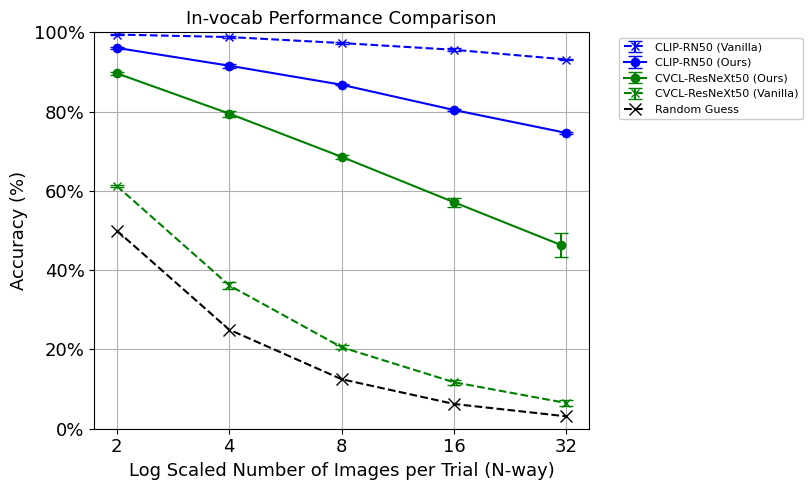

In [36]:

# Plotting
fig, ax = plt.subplots(figsize=(8.3, 5))

# Define model name mappings
model_names = {
    'clip-res': 'CLIP-RN50',
    'cvcl-resnext': 'CVCL-ResNeXt50'
}

# Define colors and styles
colors = {
    'clip-res': 'b',
    'cvcl-resnext': 'g'
}

styles = {
    'baseline': {'linestyle': '--', 'marker': 'x'},
    'neuron': {'linestyle': '-', 'marker': 'o'}
}

# Plot baseline data
for model in ['clip-res', 'cvcl-resnext']:
    model_data = baseline_df[baseline_df['model'] == model]
    ax.errorbar(model_data['num_img_per_trial'], 
                model_data['overall_accuracy']['mean'],
                yerr=model_data['overall_accuracy']['std'],
                label=f"{model_names[model]} (Vanilla)",
                color=colors[model],
                **styles['baseline'],
                capsize=5)

# Plot neuron data
for model in ['clip-res', 'cvcl-resnext']:
    model_data = neuron_df[neuron_df['model'] == model]
    ax.errorbar(model_data['num_img_per_trial'], 
                model_data['overall_accuracy']['mean'],
                yerr=model_data['overall_accuracy']['std'],
                label=f"{model_names[model]} (Ours)",
                color=colors[model],
                **styles['neuron'],
                capsize=5)

# Calculate and plot the random baseline
num_images = np.array([2, 4, 8, 16, 32])
baseline = 1 / num_images
ax.plot(num_images, baseline, label='Random Guess', 
        color='black', linestyle='--', marker='x', markersize=8)

# Set x-axis to log scale
ax.set_xscale('log', base=2)
ax.set_xticks(num_images)
ax.set_xticklabels(num_images)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Format y-axis as percentage
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
ax.set_ylim(0, 1.0)
title_font = 13
# Labels and formatting
ax.tick_params(axis='both', which='major', labelsize=13)
ax.set_xlabel('Log Scaled Number of Images per Trial (N-way)', fontsize=13)
ax.set_ylabel('Accuracy (%)', fontsize=13)
ax.set_title('In-vocab Performance Comparison', fontsize=title_font)

# Create ordered handles and labels
handles, labels = ax.get_legend_handles_labels()
# Create a mapping of label to handle
label_handle_map = dict(zip(labels, handles))

# Define desired order
desired_order = [
    'CLIP-RN50 (Vanilla)',
    'CLIP-RN50 (Ours)',
    'CVCL-ResNeXt50 (Ours)',
    'CVCL-ResNeXt50 (Vanilla)',
    'Random Guess'
]

# Reorder handles based on desired order
ordered_handles = [label_handle_map[label] for label in desired_order]
ordered_labels = desired_order

ax.legend(ordered_handles, ordered_labels, 
         bbox_to_anchor=(1.05, 1), 
         loc='upper left', 
         fontsize=8,
         framealpha=1.0)


plt.grid(True)
plt.tight_layout()
plt.savefig('plots/in-vocab_acc.pdf', bbox_inches='tight', dpi=300)
plt.show()

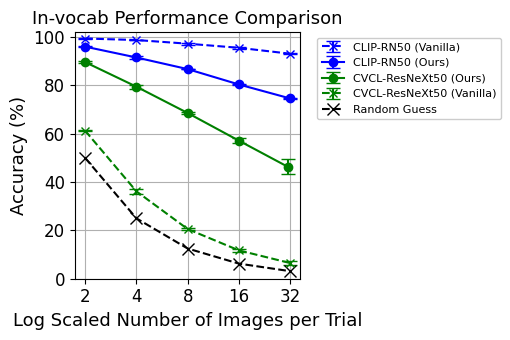

In [9]:
from matplotlib.ticker import MultipleLocator

# Plotting
fig, ax = plt.subplots(figsize=(5.3, 3.5))

# Define model name mappings
model_names = {
    'clip-res': 'CLIP-RN50',
    'cvcl-resnext': 'CVCL-ResNeXt50'
}

# Define colors and styles
colors = {
    'clip-res': 'b',
    'cvcl-resnext': 'g'
}

styles = {
    'baseline': {'linestyle': '--', 'marker': 'x'},
    'neuron': {'linestyle': '-', 'marker': 'o'}
}

# Plot baseline data
for model in ['clip-res', 'cvcl-resnext']:
    model_data = baseline_df[baseline_df['model'] == model]
    ax.errorbar(model_data['num_img_per_trial'], 
                model_data['overall_accuracy']['mean'],
                yerr=model_data['overall_accuracy']['std'],
                label=f"{model_names[model]} (Vanilla)",
                color=colors[model],
                **styles['baseline'],
                capsize=5)

# Plot neuron data
for model in ['clip-res', 'cvcl-resnext']:
    model_data = neuron_df[neuron_df['model'] == model]
    ax.errorbar(model_data['num_img_per_trial'], 
                model_data['overall_accuracy']['mean'],
                yerr=model_data['overall_accuracy']['std'],
                label=f"{model_names[model]} (Ours)",
                color=colors[model],
                **styles['neuron'],
                capsize=5)

# Calculate and plot the random baseline
num_images = np.array([2, 4, 8, 16, 32])
baseline = 1 / num_images
ax.plot(num_images, baseline, label='Random Guess', 
        color='black', linestyle='--', marker='x', markersize=8)

# Set x-axis to log scale
ax.set_xscale('log', base=2)
ax.set_xticks(num_images)
ax.set_xticklabels(num_images)
ax.get_xaxis().set_major_formatter(plt.ScalarFormatter())

# Format y-axis as percentage
ax.yaxis.set_major_formatter(lambda x, p: f'{int(x*100)}')  # Format as 0-100 without % symbol
ax.yaxis.set_major_locator(MultipleLocator(0.2))  # Set major ticks every 0.2 (20 in display)
ax.set_ylim(0, 1.02)  # Keep original 0-1 scale

# Labels and formatting
title_font = 13 
ax.tick_params(axis='both', which='major', labelsize=12)    
ax.set_xlabel('Log Scaled Number of Images per Trial', fontsize=title_font)
ax.set_ylabel('Accuracy (%)', fontsize=title_font)
ax.set_title('In-vocab Performance Comparison', fontsize=title_font)

# Create ordered handles and labels
handles, labels = ax.get_legend_handles_labels()
# Create a mapping of label to handle
label_handle_map = dict(zip(labels, handles))

# Define desired order
desired_order = [
    'CLIP-RN50 (Vanilla)',
    'CLIP-RN50 (Ours)',
    'CVCL-ResNeXt50 (Ours)',
    'CVCL-ResNeXt50 (Vanilla)',
    'Random Guess'
]

# Reorder handles based on desired order
ordered_handles = [label_handle_map[label] for label in desired_order]
ordered_labels = desired_order

ax.legend(ordered_handles, ordered_labels, 
         bbox_to_anchor=(1.05, 1), 
         loc='upper left', 
         fontsize=8,
         framealpha=1.0)


plt.grid(True)
plt.tight_layout()
plt.savefig('plots/in-vocab_acc.pdf', bbox_inches='tight', dpi=300)
plt.show()

#### CVCL Repro Class Accuracy

In [13]:
import json
import os 
neuron_trial_path = 'datasets/trials/seen_cvcl_konk_baby+konk+30k_object_5_4_2.json'
trial_path = 'datasets/trials/published_trial.json'
with open(neuron_trial_path) as f:
    neuron_trial_data = json.load(f)
with open(trial_path) as f:
    trial_data = json.load(f)

class_names = []
for trial in trial_data:
    class_names.append(trial['target_category'])
class_names = list(set(class_names))
print(class_names)
print(f"Number of classes: {len(class_names)}")

neuron_class_names = []
for trial in neuron_trial_data:
    neuron_class_names.append(trial['target_category'])
neuron_class_names = list(set(neuron_class_names))
print(neuron_class_names)
print(f"Number of appeared classes: {len(neuron_class_names)}")


unappeared_class = set(class_names) - set(neuron_class_names)
print(f"Unappeared classes: {unappeared_class}")
print(f"Number of unappeared classes: {len(unappeared_class)}")


['tree', 'watch', 'bed', 'hairbrush', 'rock', 'toothpaste', 'bucket', 'pen', 'scissors', 'train', 'cat', 'sofa', 'bike', 'crib', 'dog', 'basket', 'knife', 'microwave', 'desk', 'tricycle', 'jacket', 'chair', 'shoe', 'stamp', 'cookie', 'apple', 'pizza', 'pants', 'socks', 'sandwich', 'bottle', 'tv', 'airplane', 'key', 'button', 'leaves', 'necklace', 'bird', 'bagel', 'coin', 'hat', 'ring', 'juice', 'broom', 'bowl', 'umbrella', 'cake', 'ball', 'phone', 'bench', 'bell', 'backpack', 'balloon', 'stool', 'clock', 'camera', 'kayak', 'pipe', 'cheese', 'fan', 'guitar', 'turtle', 'butterfly', 'spoon']
Number of classes: 64
['hairbrush', 'bucket', 'pen', 'scissors', 'sofa', 'bike', 'knife', 'microwave', 'desk', 'tricycle', 'chair', 'stamp', 'cookie', 'apple', 'pizza', 'pants', 'socks', 'sandwich', 'button', 'necklace', 'bagel', 'hat', 'broom', 'bowl', 'umbrella', 'ball', 'stool', 'clock', 'camera', 'kayak', 'fan']
Number of appeared classes: 31
Unappeared classes: {'tree', 'watch', 'bed', 'rock', 't

In [14]:
df = pd.read_csv('overall_acc.csv')
df = df[(df['model']=='cvcl-resnext') & (df['class_type']=='seen') & (df['num_img_per_trial']==4)]
df

,overall_accuracy,model,batch_size,device,seed,trial_type,class_type,object_resize,num_img_per_trial,num_trials_per_image,layers,top_k,map_file,trial_path,results_dir
78,0.794409,cvcl-resnext,128,cuda:0,0,custom,seen,False,4,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/seen_cvcl_konk_baby+konk+30k_o...,results/cvcl-resnext_custom_2024-10-18-11-10-07
79,0.803011,cvcl-resnext,128,cuda:0,1,custom,seen,False,4,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/seen_cvcl_konk_baby+konk+30k_o...,results/cvcl-resnext_custom_2024-10-18-11-11-15
80,0.787527,cvcl-resnext,128,cuda:0,2,custom,seen,False,4,5,NaN,1.0,neuron_concepts/cvcl_konk_baby+konk+30k.csv,datasets/trials/seen_cvcl_konk_baby+konk+30k_o...,results/cvcl-resnext_custom_2024-10-18-11-12-18
303,0.370000,cvcl-resnext,128,cuda:1,0,custom,seen,False,4,5,NaN,NaN,NaN,datasets/trials/seen_object_5_4_0.json,results/cvcl-resnext_custom_2024-10-28-01-15-11
304,0.352083,cvcl-resnext,128,cuda:1,1,custom,seen,False,4,5,NaN,NaN,NaN,datasets/trials/seen_object_5_4_1.json,results/cvcl-resnext_custom_2024-10-28-01-17-33
305,0.363333,cvcl-resnext,128,cuda:1,2,custom,seen,False,4,5,NaN,NaN,NaN,datasets/trials/seen_object_5_4_2.json,results/cvcl-resnext_custom_2024-10-28-01-19-40


In [15]:
import json
import os

class_acc_dict = {}
for result_dir in df['results_dir'].unique():
    class_acc = json.load(open(os.path.join(result_dir, 'accuracies.json')))
    for class_name, accuracy in class_acc['class_accuracies'].items():
        if class_name not in class_acc_dict:
            class_acc_dict[class_name] = []
        class_acc_dict[class_name].append(accuracy)

class_stats = {}
for class_name, accuracies in class_acc_dict.items():
    class_stats[class_name] = {
        'mean': np.mean(accuracies),
        'std': np.std(accuracies),
        'count': len(accuracies)
    }

# Convert to DataFrame for easier manipulation and display
df_class_stats = pd.DataFrame.from_dict(class_stats, orient='index')
df_class_stats = df_class_stats.sort_values('mean', ascending=False)

# Add 'Category' column as the first column
df_class_stats.insert(0, 'category', df_class_stats.index)
df_class_stats = df_class_stats.reset_index(drop=True)

df_class_stats


,category,mean,std,count
0,microwave,0.795556,0.179327,6
1,broom,0.788889,0.173405,6
2,dog,0.773333,0.060614,3
3,clock,0.753333,0.125728,6
4,butterfly,0.742222,0.069991,3
...,...,...,...,...
59,bottle,0.200000,0.066221,3
60,phone,0.182222,0.016630,3
61,coin,0.177778,0.012571,3
62,airplane,0.133333,0.047454,3


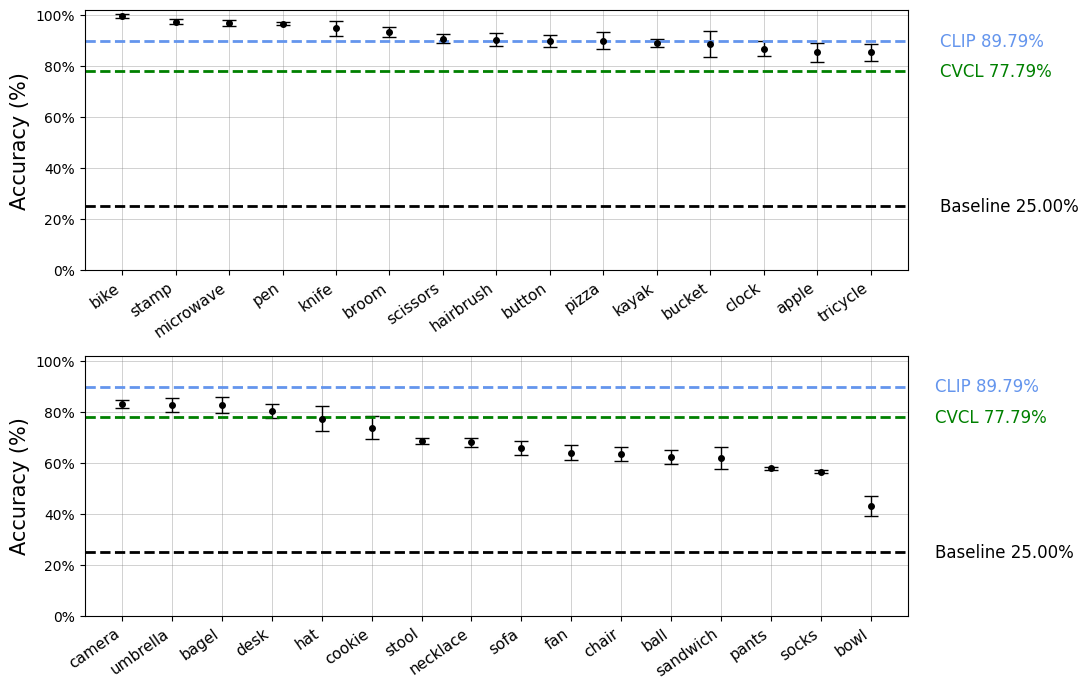

In [29]:
import matplotlib.ticker as mtick
import seaborn as sns

def plt_class_acc(df_class, split_index):
    categories = df_class['category'].unique()
            
    dfs = [df_class[df_class['category'].isin(categories[:split_index])], 
           df_class[df_class['category'].isin(categories[split_index:])]]

    fig, axs = plt.subplots(2, 1, figsize=(11, 7), sharey=True)

    for i, df_part in enumerate(dfs):
        # Sort the dataframe by mean accuracy in descending order
        df_part = df_part.sort_values('mean', ascending=False)
        
        # Create the error bar plot
        axs[i].errorbar(range(len(df_part)), df_part['mean'], yerr=df_part['std'], 
                        fmt='o', color='black', capsize=5, markersize=4, 
                        ecolor='black', elinewidth=1)
        
        axs[i].set_xticks(range(len(df_part)))
        axs[i].set_xticklabels(df_part['category'], rotation=35, ha='right', fontsize=11)
        axs[i].set_ylabel('Accuracy (%)', fontsize=15)
        axs[i].set_xlabel('')
        axs[i].axhline(y=0.25, color='black', linestyle='--', linewidth=2.0)
        axs[i].axhline(y=0.777921, color='green', linestyle='--', linewidth=2.0)
        axs[i].axhline(y=0.897861, color='cornflowerblue', linestyle='--', linewidth=2.0)
        
        axs[i].text(len(df_part['category']) + 0.3, 0.777921, f'CVCL {0.777921*100:.2f}%',
                    color='green', va='center', fontsize=12)
        axs[i].text(len(df_part['category']) + 0.3, 0.897861, f'CLIP {0.897861*100:.2f}%',
                    color='cornflowerblue', va='center', fontsize=12)
        axs[i].text(len(df_part['category']) + 0.3, 0.25, f'Baseline 25.00%',
                    color='Black', va='center', fontsize=12)
        
        axs[i].grid(True, linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
        axs[i].set_ylim(0, 1.02)
        axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    plt.tight_layout()
    plt.show()

plt_class_acc(df_class_stats, len(df_class_stats) // 2)

In [ ]:
import matplotlib.ticker as mtick
import seaborn as sns

def plt_class_acc(df_class, overall_acc, df_repro, overall_acc_repro, split_index):
    categories = df_class['category'].unique()
            
    dfs = [df_class[df_class['category'].isin(categories[:split_index])], 
           df_class[df_class['category'].isin(categories[split_index:])]]

    fig, axs = plt.subplots(2, 1, figsize=(11, 7), sharey=True)

    for i, df_part in enumerate(dfs):
        # Sort the dataframe by mean accuracy in descending order
        df_part = df_part.sort_values('mean', ascending=False)
        
        # Create the error bar plot
        axs[i].errorbar(range(len(df_part)), df_part['mean'], yerr=df_part['std'], 
                        fmt='o', color='black', capsize=5, markersize=4, 
                        ecolor='black', elinewidth=1)
        
        axs[i].set_xticks(range(len(df_part)))
        axs[i].set_xticklabels(df_part['category'], rotation=35, ha='right', fontsize=11)
        axs[i].set_ylabel('Accuracy (%)', fontsize=15)
        axs[i].set_xlabel('')
        axs[i].axhline(y=0.25, color='black', linestyle='--', linewidth=2.0)
        axs[i].axhline(y=0.777921, color='green', linestyle='--', linewidth=2.0)
        axs[i].axhline(y=0.897861, color='cornflowerblue', linestyle='--', linewidth=2.0)
        
        axs[i].text(len(df_part['category']) + 0.3, 0.777921, f'CVCL {0.777921*100:.2f}%',
                    color='green', va='center', fontsize=12)
        axs[i].text(len(df_part['category']) + 0.3, 0.897861, f'CLIP {0.897861*100:.2f}%',
                    color='cornflowerblue', va='center', fontsize=12)
        axs[i].text(len(df_part['category']) + 0.3, 0.25, f'Baseline 25.00%',
                    color='Black', va='center', fontsize=12)
        
        axs[i].grid(True, linestyle='-', linewidth='0.5', color='gray', alpha=0.5)
        axs[i].set_ylim(0, 1.02)
        axs[i].yaxis.set_major_formatter(mtick.PercentFormatter(1.0))
    
    plt.tight_layout()
    plt.show()

plt_class_acc(df_class_stats, len(df_class_stats) // 2)

Analysis Top-k Effect